In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join

In [ ]:
def pyramid_img(img,count_down,count_up):
    
    img_copy = img.copy()
    pyramid_list = []
    
    for k in range(count_down):
        img_copy = cv.pyrDown(img_copy)
        pyramid_list.append(img_copy)
        
    img_copy = img.copy()
    
    for t in range(count_up):
        img_copy = cv.pyrUp(img_copy)
        pyramid_list.append(img_copy)
        
    pyramid_list.append(img)
    
    return pyramid_list

In [ ]:
def matches_ (method_,templates_,img):
    
    

    boxes = []
    for z in method_:
        
        sw = False
        threshold = 0.0
        cont = 0
        
      

        for n in templates_:
            
          
          
            try:
            
                method = eval(z)
                res = cv.matchTemplate(img,n,method)
                h,w = n.shape
      
              
              ##BLOCK FROM https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html
              
                if threshold:
      
                    loc = np.where(res >= threshold)
                      
                    for pt in zip(*loc[::-1]):
                        
                        bottom_right = (pt[0] + w, pt[1] + h)
                        boxes.append((pt,bottom_right,max_val))
                        print(boxes)
      
      
                else:
                
                    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
                  
                    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
                        
                        top_left = min_loc
                        sw = True
                        
                    else:
                        
                        top_left = max_loc
                        bottom_right = (top_left[0] + w, top_left[1] + h)
                        boxes.append((top_left, bottom_right, max_val))
                        #cv.imwrite(str(z)+"_"+str(cont)+"_"+".jpg", cv.rectangle(img.copy(),top_left, bottom_right, 255, 10))  
                        cont =  cont +1
                  
            except:
              
              res = [(0,0,0,0,0)]

    return boxes

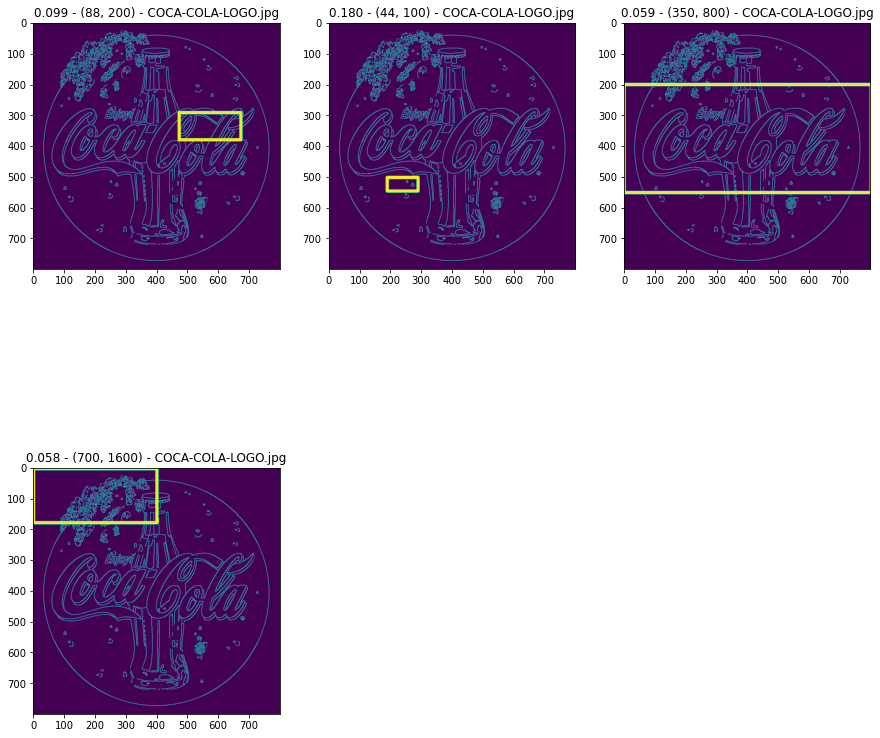

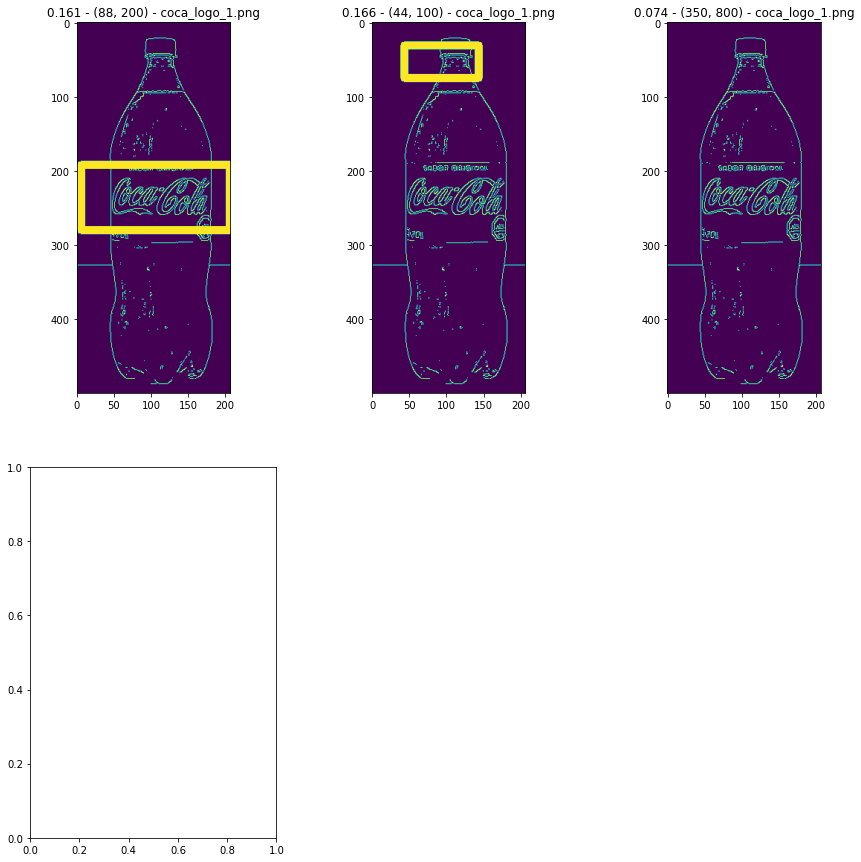

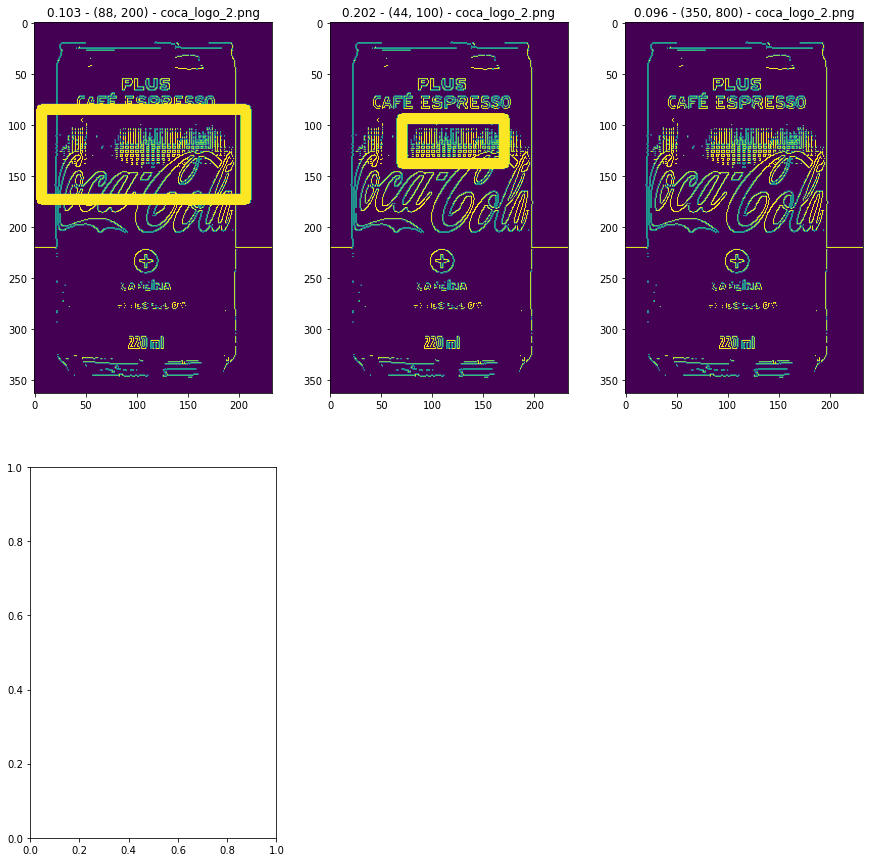

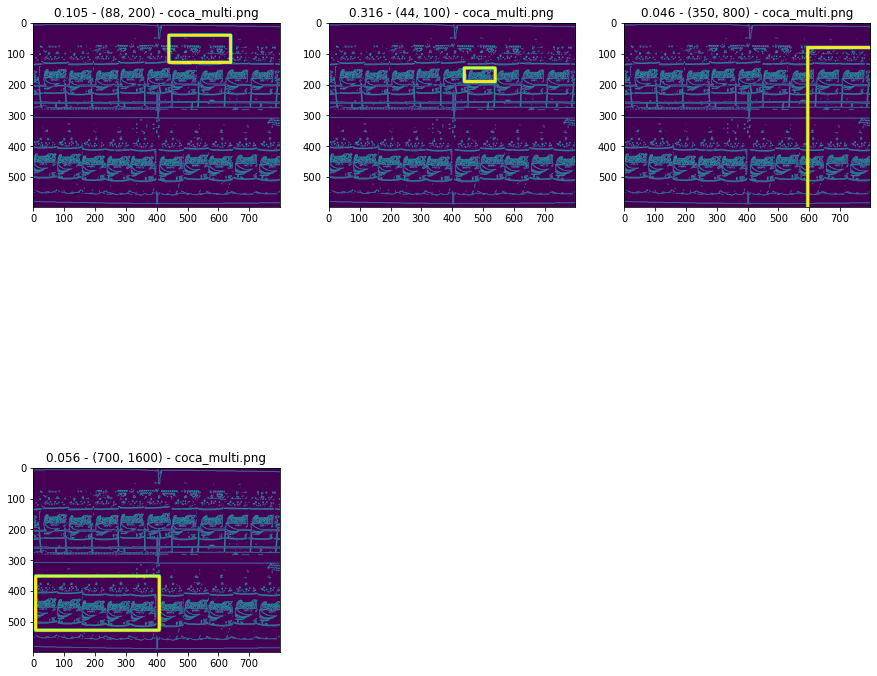

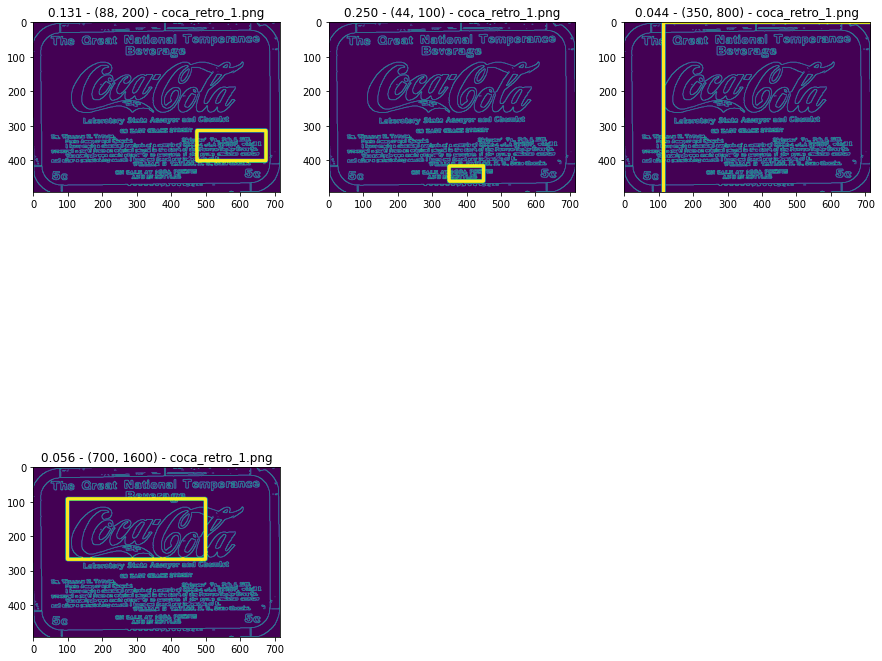

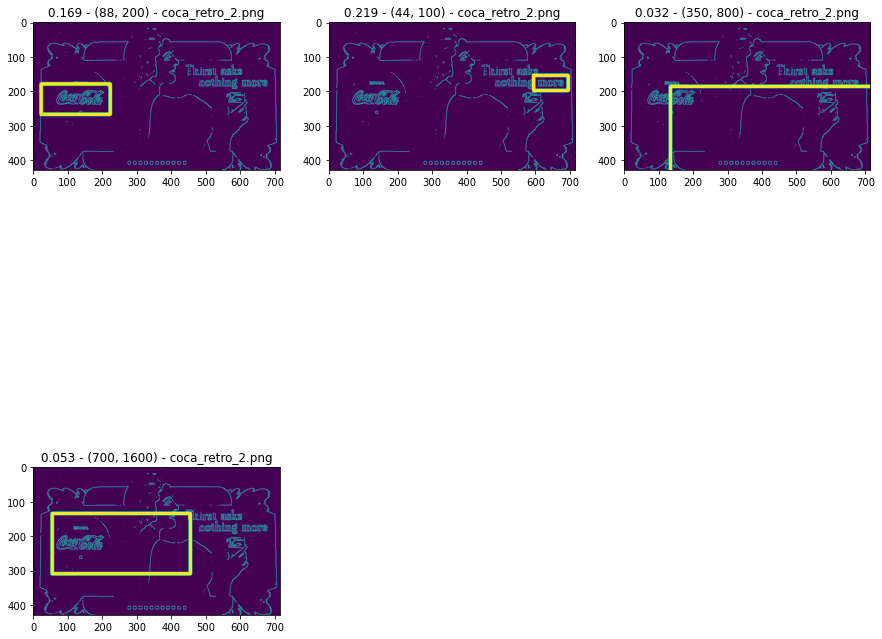

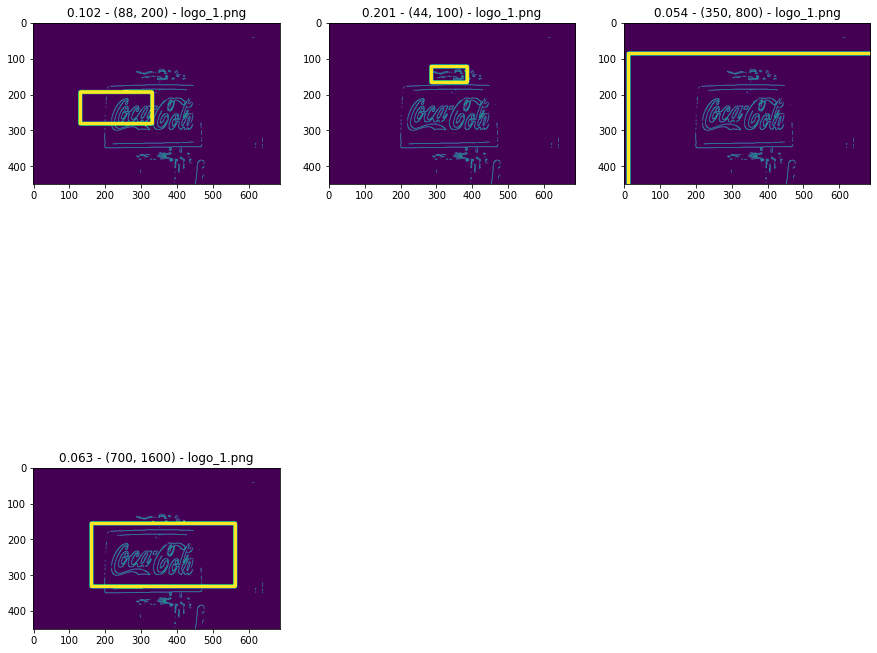

In [ ]:
onlyfiles = [f for f in listdir(r"C:\Users\10\Downloads\COKE\images") if isfile(join(r"C:\Users\10\Downloads\COKE\images", f))]

src_img = r"images\pattern.png"
template = cv.Canny(cv.imread(src_img,0),260, 260, apertureSize = 3)

for t in onlyfiles:
        
    try:
        excepts = ["pattern.png"]
        if t not in excepts:
            
            src_img = "images/" + t
            img = cv.imread(src_img, 0)
            img = cv.Canny(cv.imread(src_img,0),260, 260, apertureSize = 3)

            method_ = ['cv.TM_CCOEFF_NORMED']

            templates_ = pyramid_img(template, 2, 2)

            box = (matches_(method_,templates_,img))
            val = 231
            plt.figure(figsize=(15,15))
            for h in range(len(templates_)-1):
                
                plt.subplot(val+h)
                plt.title('{:.3f} - {} - {}'.format(box[h][2],templates_[h].shape,t))    
                plt.imshow(cv.rectangle(img.copy(),box[h][0], box[h][1], 255, 10))
                
    except:
        
        print(" ")

##CONCLUSIONES: Cada uno de las imagenes anteriores es generando un resultado a partir de cv.TM_CCOEFF_NORMED y generando una piramide de fotos con cv.pyrUp y cv.pyrDown, el listado de templates escalados es generado con pyramid_img y luego es matcheado con la función matches_ recorriendo el directorio donde están mis imagenes, no necsariamente un template en el nivel N de mi piramide que funcion para mi imagen K servirá para una imagen J, y es lo mostrado en los titulos de  las figuras anteriores:

##Match_Value , Matched_Template_Size , Image_to_Match